In [1]:
import geopandas as gpd

## Data loading

In [7]:
from pathlib import Path

In [8]:
f_fields = Path('./data/')

In [9]:
f_fields

PosixPath('data')

In [11]:
fields = gpd.read_file(f_fields / "brpgewaspercelen_definitief_2020_small.gpkg")

<Axes: >

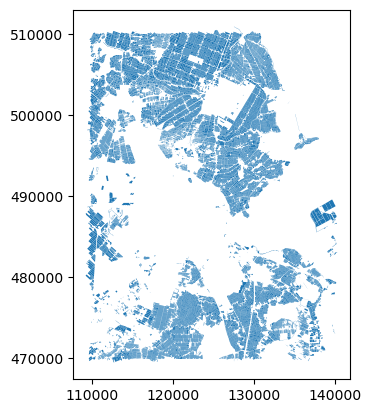

In [6]:
fields.plot()

In [12]:
fields

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117626.809 505287.535, 117622.930 50..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117744.449 504313.788, 117746.064 50..."
2,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117784.216 503525.695, 117789.021 50..."
3,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117903.681 504159.929, 117908.257 50..."
4,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((118150.139 505369.637, 118168.010 50..."
...,...,...,...,...,...,...
22026,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((139366.829 479190.018, 139391.354 47..."
22027,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((138750.889 478528.117, 138722.478 47..."
22028,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((139214.523 479446.287, 139104.402 47..."
22029,Bouwland,"Maïs, snij-",259,2020,Definitief,"POLYGON ((140196.363 479281.898, 140195.206 47..."


In [13]:
fields["category"]

0        Grasland
1        Grasland
2        Grasland
3        Grasland
4        Grasland
           ...   
22026    Grasland
22027    Grasland
22028    Grasland
22029    Bouwland
22030    Grasland
Name: category, Length: 22031, dtype: object

In [14]:
fields[fields["category"]=="Grasland"]

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117626.809 505287.535, 117622.930 50..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117744.449 504313.788, 117746.064 50..."
2,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117784.216 503525.695, 117789.021 50..."
3,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117903.681 504159.929, 117908.257 50..."
4,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((118150.139 505369.637, 118168.010 50..."
...,...,...,...,...,...,...
22025,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((139941.352 479256.022, 139942.981 47..."
22026,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((139366.829 479190.018, 139391.354 47..."
22027,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((138750.889 478528.117, 138722.478 47..."
22028,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((139214.523 479446.287, 139104.402 47..."


In [15]:
fields_1row = gpd.read_file(f_fields / "brpgewaspercelen_definitief_2020_small.gpkg", rows=1)

In [16]:
fields_1row

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117626.809 505287.535, 117622.930 50..."


In [17]:
fields_1row.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [18]:
fields.total_bounds

array([109222.03325 , 469461.512625, 140295.122125, 510939.997875])

In [20]:
xmin, xmax = (120000, 130000)

In [21]:
ymin, ymax = (490000, 500000)

In [22]:
fields_bbox = gpd.read_file(f_fields / "brpgewaspercelen_definitief_2020_small.gpkg", bbox=(xmin, ymin, xmax, ymax))

<Axes: >

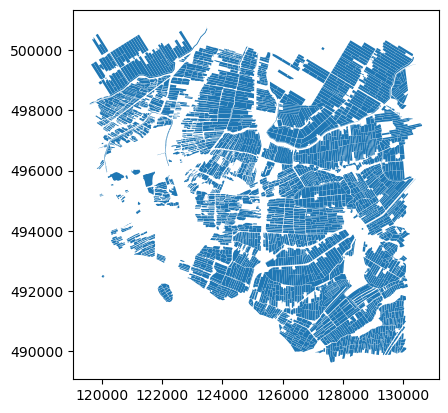

In [23]:
fields_bbox.plot()

In [28]:
import fiona

In [31]:
with fiona.open(f_fields / "brpgewaspercelen_definitief_2020_small.gpkg") as f:
    bounds = f.bounds
    crs = f.crs

In [33]:
bounds

(109222.03325, 469461.512625001, 140295.122125, 510939.997875001)

## Spatial query

In [34]:
fields

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117626.809 505287.535, 117622.930 50..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117744.449 504313.788, 117746.064 50..."
2,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117784.216 503525.695, 117789.021 50..."
3,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117903.681 504159.929, 117908.257 50..."
4,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((118150.139 505369.637, 118168.010 50..."
...,...,...,...,...,...,...
22026,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((139366.829 479190.018, 139391.354 47..."
22027,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((138750.889 478528.117, 138722.478 47..."
22028,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((139214.523 479446.287, 139104.402 47..."
22029,Bouwland,"Maïs, snij-",259,2020,Definitief,"POLYGON ((140196.363 479281.898, 140195.206 47..."


In [35]:
xmin, xmax, ymin, ymax = (120_000, 135_000, 485_000, 500_000)

In [37]:
fields_cx = fields.cx[xmin:xmax, ymin:ymax]

<Axes: >

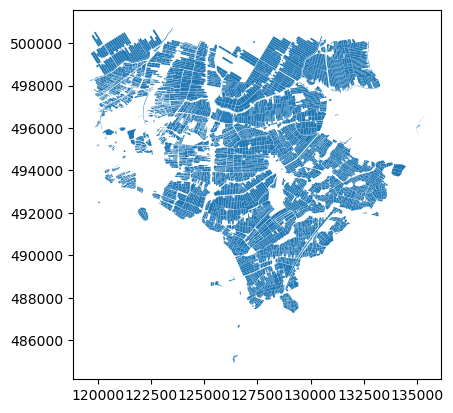

In [38]:
fields_cx.plot()

In [40]:
fields_cx.to_file("fields_cropped.shp")

In [41]:
fields_cx.to_file("fields_cropped.gpkg")

In [42]:
wells = gpd.read_file("data/brogmwvolledigeset.zip")

<Axes: >

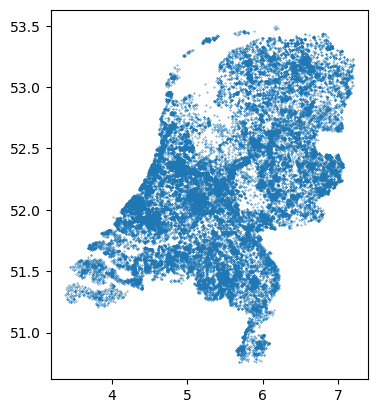

In [45]:
wells.plot(markersize=0.1)

In [46]:
wells_clip = wells.clip(fields_cx)

/home/oku/miniconda3/envs/geospatial/lib/python3.10/site-packages/geopandas/geodataframe.py:2362: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4258
Right CRS: EPSG:28992

  return geopandas.clip(self, mask=mask, keep_geom_type=keep_geom_type)


In [47]:
wells = wells.to_crs(fields_cx.crs)

In [48]:
wells.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [49]:
wells_clip = wells.clip(fields_cx)

<Axes: >

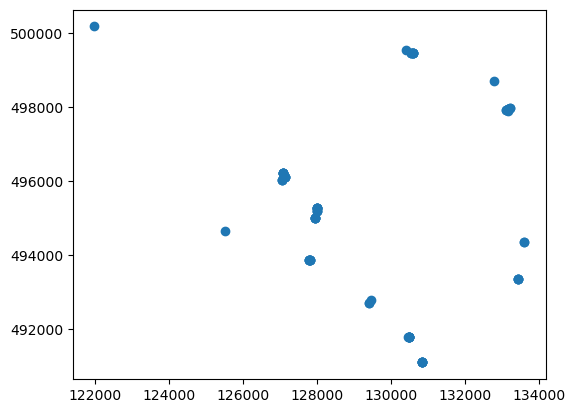

In [51]:
wells_clip.plot()

<Axes: >

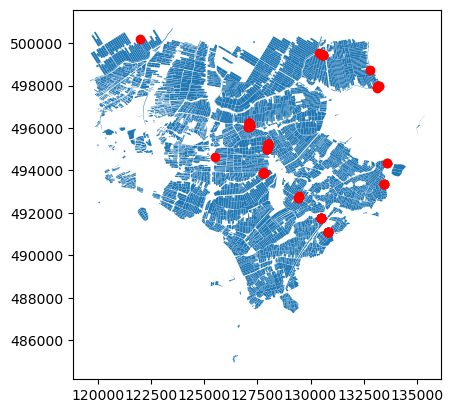

In [55]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
fields_cx.plot(ax=ax)
wells_clip.plot(ax=ax, color='r')

In [56]:
fields.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [59]:
buffer = fields_cx.buffer(50)

<Axes: >

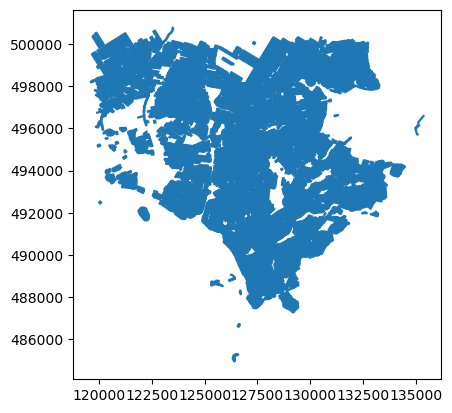

In [60]:
buffer.plot()

In [61]:
wells_clip_buffer = wells.clip(buffer)

<Axes: >

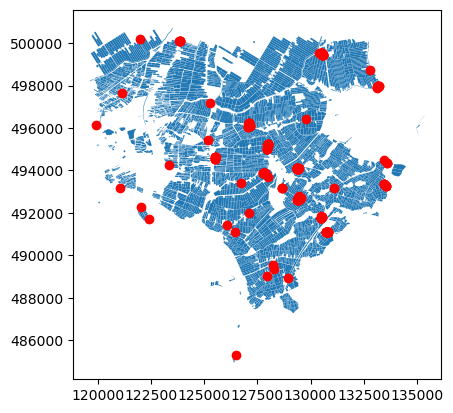

In [62]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
fields_cx.plot(ax=ax)
wells_clip_buffer.plot(ax=ax, color='r')

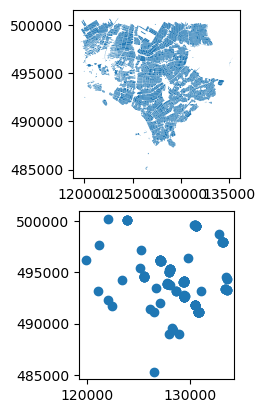

In [66]:
fig, axes = plt.subplots(2, 1)

for ax, geom in zip(axes, [fields_cx, wells_clip_buffer]):
    geom.plot(ax=ax)
    

In [68]:
buffer

64       POLYGON ((119647.327 500387.521, 119648.866 50...
77       POLYGON ((120411.659 500059.824, 120412.615 50...
435      POLYGON ((121242.598 499139.608, 121237.180 49...
437      POLYGON ((121374.384 499899.553, 121371.741 49...
439      POLYGON ((121369.088 499805.591, 121369.106 49...
                               ...                        
21338    POLYGON ((133677.477 493274.771, 133672.053 49...
21339    POLYGON ((133450.676 493118.785, 133448.322 49...
21340    POLYGON ((133487.183 493354.640, 133484.355 49...
21429    POLYGON ((135010.378 496094.227, 135068.234 49...
21452    POLYGON ((135047.405 496000.571, 135048.225 49...
Length: 4872, dtype: geometry

In [72]:
fields_cx

,category,gewas,gewascode,jaar,status,geometry
64,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((119676.580 500347.036, 119823.955 50..."
77,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120631.197 499818.532, 120672.130 49..."
435,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121237.209 499189.398, 121256.425 49..."
437,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121424.388 499918.068, 121425.502 49..."
439,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121418.811 499800.479, 121424.672 49..."
...,...,...,...,...,...,...
21338,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133630.043 493290.582, 133635.202 49..."
21339,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133572.822 493095.040, 133573.881 49..."
21340,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133480.387 493404.176, 133491.479 49..."
21429,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((135049.220 496062.653, 135034.988 49..."


In [73]:
fields_cx.dissolve?

Signature:
fields_cx.dissolve(
    by=None,
    aggfunc='first',
    as_index=True,
    level=None,
    sort=True,
    observed=False,
    dropna=True,
    **kwargs,
)
Docstring:
Dissolve geometries within `groupby` into single observation.
This is accomplished by applying the `unary_union` method
to all geometries within a groupself.

Observations associated with each `groupby` group will be aggregated
using the `aggfunc`.

Parameters
----------
by : string, default None
    Column whose values define groups to be dissolved. If None,
    whole GeoDataFrame is considered a single group.
aggfunc : function or string, default "first"
    Aggregation function for manipulation of data associated
    with each group. Passed to pandas `groupby.agg` method.
    Accepted combinations are:

    - function
    - string function name
    - list of functions and/or function names, e.g. [np.sum, 'mean']
    - dict of axis labels -> functions, function names or list of such.
as_index : boolean, defa

In [74]:
fields_buffer = fields_cx.copy()

In [75]:
fields_buffer["geometry"] = buffer

In [76]:
fields_buffer

,category,gewas,gewascode,jaar,status,geometry
64,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((119647.327 500387.521, 119648.866 50..."
77,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120411.659 500059.824, 120412.615 50..."
435,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121242.598 499139.608, 121237.180 49..."
437,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121374.384 499899.553, 121371.741 49..."
439,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121369.088 499805.591, 121369.106 49..."
...,...,...,...,...,...,...
21338,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133677.477 493274.771, 133672.053 49..."
21339,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133450.676 493118.785, 133448.322 49..."
21340,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133487.183 493354.640, 133484.355 49..."
21429,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((135010.378 496094.227, 135068.234 49..."


<Axes: >

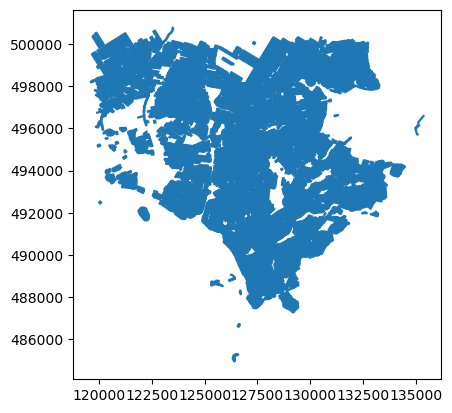

In [77]:
fields_buffer.plot()

In [78]:
fields_buffer_dissolve = fields_buffer.dissolve()

In [79]:
fields_buffer_dissolve

,geometry,category,gewas,gewascode,jaar,status
0,"MULTIPOLYGON (((120037.937 492388.957, 120033....",Grasland,"Grasland, blijvend",265,2020,Definitief


In [91]:
type(fields_buffer_dissolve['geometry'])

geopandas.geoseries.GeoSeries

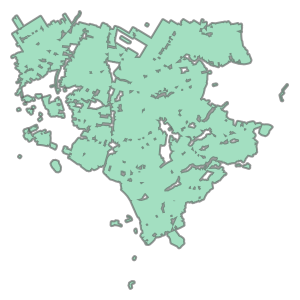

In [81]:
fields_buffer_dissolve['geometry'][0]

In [85]:
exploded = fields_buffer_dissolve.explode()

/tmp/ipykernel_12612/4273654392.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  exploded = fields_buffer_dissolve.explode()


In [84]:
fields_cx.shape

(4872, 6)

In [87]:
exploded.shape

(27, 6)

In [88]:
wells_clip_buffer_dissolved = wells.clip(fields_buffer_dissolve)

<Axes: >

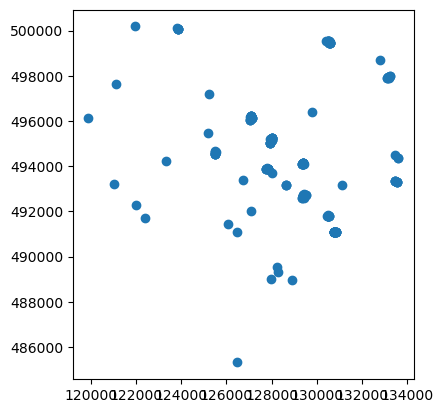

In [89]:
wells_clip_buffer_dissolved.plot()

#### Exercise: clip fields within 500m from the wells
This time, we will do a selection the other way around. Can you clip `fields` with the 500m buffer of `wells`? Please visualize the results.

If you would like to load the two datasets again, use:

```python
fields_cx = gpd.read_file("fields_cropped.shp")
wells = gpd.read_file("data/brogmwvolledigeset.zip")
```

- Hint 1: The `wells` object contains all the wells in the Netherlands. It might be too big to call `.buffer()` function directly on it. To improve the performance, first crop it with the bounding box of the fields.

- Hint 2: If you load the data again, do not forget the CRS conversion. The file `brogmwvolledigeset.zip` is in CRS 4326.

In [2]:
import geopandas as gpd
fields_cx = gpd.read_file("fields_cropped.shp")
wells = gpd.read_file("data/brogmwvolledigeset.zip")

In [3]:
wells = wells.to_crs(fields_cx.crs)

In [5]:
xmin, ymin, xmax, ymax = fields_cx.total_bounds

In [9]:
wells_cx = wells.cx[xmin-500:xmax+500, ymin-500:ymax+500]

<Axes: >

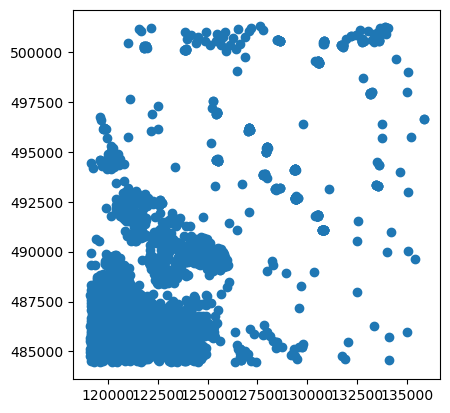

In [10]:
wells_cx.plot()

In [11]:
buffer_wells_cx = wells_cx.buffer(500)

<Axes: >

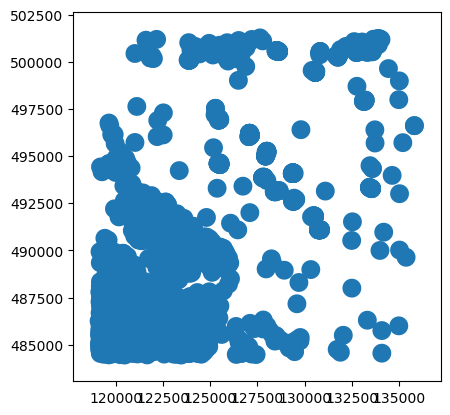

In [12]:
buffer_wells_cx.plot()

In [13]:
fields_wells_cx_buffer_clip = fields_cx.clip(buffer_wells_cx)

<Axes: >

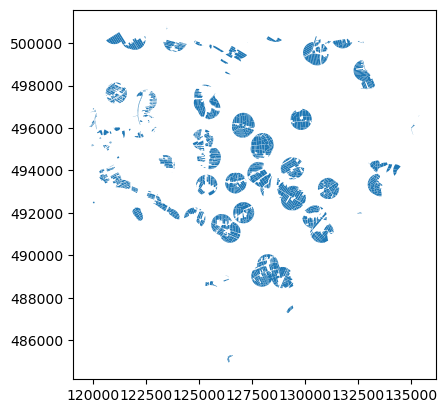

In [14]:
fields_wells_cx_buffer_clip.plot()

In [19]:
fields_wells_cx_buffer_clip

,category,gewas,gewascode,jaar,status,geometry
127,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((126381.243 484963.040, 126379.347 48..."
104,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((126347.690 485044.311, 126347.340 48..."
105,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((126332.154 485084.112, 126328.874 48..."
119,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((126324.667 485101.181, 126354.768 48..."
183,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((126174.059 488766.161, 126173.316 48..."
...,...,...,...,...,...,...
1755,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((124423.562 499953.551, 124426.353 49..."
1766,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((124098.612 500012.574, 124153.083 49..."
1746,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((124078.967 500024.629, 124079.711 50..."
1732,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((123715.904 500082.372, 123723.048 50..."


In [18]:
fields_wells_cx_buffer_clip.area

127      5222.251782
104      2165.601663
105      3280.808433
119     14803.267140
183      6351.969213
            ...     
1755     1098.048191
1766     5025.082378
1746     8527.068186
1732    27063.321320
2793     1357.981547
Length: 1721, dtype: float64

## spatial join

In [21]:
fields_cx.sjoin?

Signature: fields_cx.sjoin(df, *args, **kwargs)
Docstring:
Spatial join of two GeoDataFrames.

See the User Guide page :doc:`../../user_guide/mergingdata` for details.

Parameters
----------
df : GeoDataFrame
how : string, default 'inner'
    The type of join:

    * 'left': use keys from left_df; retain only left_df geometry column
    * 'right': use keys from right_df; retain only right_df geometry column
    * 'inner': use intersection of keys from both dfs; retain only
      left_df geometry column

predicate : string, default 'intersects'
    Binary predicate. Valid values are determined by the spatial index used.
    You can check the valid values in left_df or right_df as
    ``left_df.sindex.valid_query_predicates`` or
    ``right_df.sindex.valid_query_predicates``
lsuffix : string, default 'left'
    Suffix to apply to overlapping column names (left GeoDataFrame).
rsuffix : string, default 'right'
    Suffix to apply to overlapping column names (right GeoDataFrame).

Examples


In [22]:
fields_cx

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((119676.580 500347.036, 119688.039 50..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120631.197 499818.532, 120595.295 49..."
2,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121237.209 499189.398, 121228.989 49..."
3,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121424.388 499918.068, 121423.197 49..."
4,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121418.811 499800.479, 121425.512 49..."
...,...,...,...,...,...,...
4867,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133630.043 493290.582, 133624.619 49..."
4868,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133572.822 493095.040, 133573.087 49..."
4869,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133480.387 493404.176, 133477.559 49..."
4870,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((135049.220 496062.653, 135108.486 49..."


In [25]:
buffer_wells_cx

1136     POLYGON ((123227.241 492431.721, 123224.833 49...
1220     POLYGON ((123132.482 492566.291, 123130.074 49...
1256     POLYGON ((123098.161 492366.122, 123095.754 49...
1280     POLYGON ((123050.471 492400.241, 123048.063 49...
1375     POLYGON ((123070.811 492333.891, 123068.403 49...
                               ...                        
53325    POLYGON ((124035.000 490080.000, 124032.592 49...
53443    POLYGON ((121504.000 487189.000, 121501.592 48...
53444    POLYGON ((122888.900 485440.200, 122886.492 48...
53449    POLYGON ((130247.600 485211.100, 130245.192 48...
53450    POLYGON ((130077.100 485243.700, 130074.692 48...
Length: 2264, dtype: geometry

In [27]:
gdf_buffer_wells_cx = wells_cx.copy()

In [28]:
gdf_buffer_wells_cx['geometry'] = buffer_wells_cx

In [29]:
gdf_buffer_wells_cx

,bro_id,delivery_accountable_party,quality_regime,with_prehistory,delivery_context,construction_standard,initial_function,removed,number_of_monitoring_tubes,groundlevel_stable,...,corrected,latest_correction_time,under_review,under_review_time,deregistered,deregistration_time,reregistered,reregistration_time,coordinate_transformation,geometry
1136,GMW000000005275,27364178,IMBRO/A,ja,publiekeTaak,onbekend,stand,nee,1.0,ja,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008,"POLYGON ((123227.241 492431.721, 123224.833 49..."
1220,GMW000000005361,27364178,IMBRO/A,ja,publiekeTaak,onbekend,stand,nee,1.0,ja,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008,"POLYGON ((123132.482 492566.291, 123130.074 49..."
1256,GMW000000005369,27364178,IMBRO/A,ja,publiekeTaak,onbekend,stand,nee,1.0,ja,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008,"POLYGON ((123098.161 492366.122, 123095.754 49..."
1280,GMW000000005343,27364178,IMBRO/A,ja,publiekeTaak,onbekend,stand,nee,1.0,ja,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008,"POLYGON ((123050.471 492400.241, 123048.063 49..."
1375,GMW000000005460,27364178,IMBRO/A,ja,publiekeTaak,onbekend,stand,nee,1.0,ja,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008,"POLYGON ((123070.811 492333.891, 123068.403 49..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53325,GMW000000061826,34366966,IMBRO,nee,publiekeTaak,NEN5104,stand,nee,1.0,nee,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2018,"POLYGON ((124035.000 490080.000, 124032.592 49..."
53443,GMW000000060709,34366966,IMBRO,nee,publiekeTaak,NEN5766,stand,nee,1.0,nee,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2018,"POLYGON ((121504.000 487189.000, 121501.592 48..."
53444,GMW000000060710,34366966,IMBRO,nee,publiekeTaak,NEN5766,stand,nee,1.0,nee,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2018,"POLYGON ((122888.900 485440.200, 122886.492 48..."
53449,GMW000000060467,34366966,IMBRO,nee,publiekeTaak,geen,stand,nee,1.0,ja,...,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2018,"POLYGON ((130247.600 485211.100, 130245.192 48..."


In [30]:
fields_cx_wells_buffer_cx = fields_cx.sjoin(gdf_buffer_wells_cx)

In [32]:
fields_cx_wells_buffer_cx.shape

(11420, 46)

In [33]:
fields_cx_wells_buffer_cx

,category,gewas,gewascode,jaar,status,geometry,index_right,bro_id,delivery_accountable_party,quality_regime,...,registration_completion_time,corrected,latest_correction_time,under_review,under_review_time,deregistered,deregistration_time,reregistered,reregistration_time,coordinate_transformation
3,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121424.388 499918.068, 121423.197 49...",17311,GMW000000025405,50200097,IMBRO/A,...,NaN,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008
2345,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120995.982 499742.741, 120908.286 49...",17311,GMW000000025405,50200097,IMBRO/A,...,NaN,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008
2346,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121086.677 499790.999, 121027.857 49...",17311,GMW000000025405,50200097,IMBRO/A,...,NaN,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008
2347,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121210.605 499784.470, 121207.165 49...",17311,GMW000000025405,50200097,IMBRO/A,...,NaN,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008
2348,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((121164.228 499832.428, 121120.752 49...",17311,GMW000000025405,50200097,IMBRO/A,...,NaN,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4845,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((134289.739 493881.244, 134298.151 49...",9698,GMW000000015482,34362354,IMBRO/A,...,NaN,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008
4870,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((135049.220 496062.653, 135108.486 49...",27318,GMW000000034111,34362354,IMBRO/A,...,NaN,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008
4871,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((135080.542 495715.427, 135089.105 49...",27318,GMW000000034111,34362354,IMBRO/A,...,NaN,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008
4871,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((135080.542 495715.427, 135089.105 49...",26935,GMW000000034018,34362354,IMBRO/A,...,NaN,nee,NaN,nee,NaN,nee,NaN,nee,NaN,RDNAPTRANS2008


<Axes: >

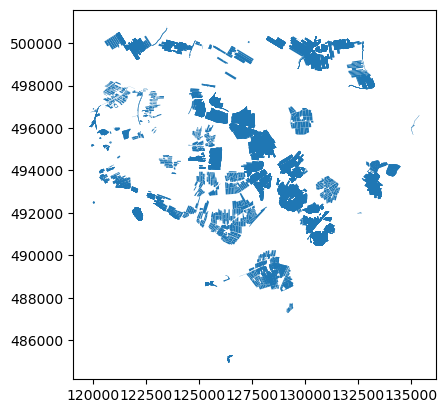

In [34]:
fields_cx_wells_buffer_cx.plot()

In [35]:
fields_cx.shape

(4872, 6)

In [36]:
fields_cx_wells_buffer_cx.index

Index([   3, 2345, 2346, 2347, 2348, 2349, 2350, 2352, 2354,    3,
       ...
       4841, 4843, 4844, 4837, 4840, 4845, 4870, 4871, 4871, 4871],
      dtype='int64', length=11420)

In [38]:
idx = fields_cx_wells_buffer_cx.index.unique()

In [42]:
fields_in_buffer = fields_cx.loc[idx]

<Axes: >

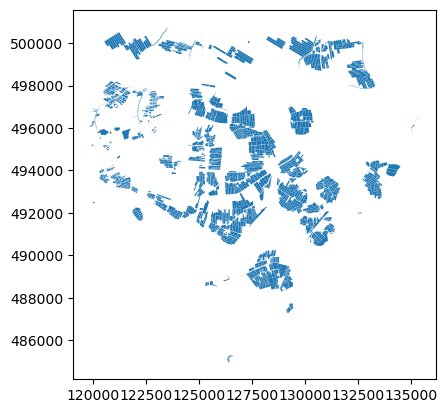

In [43]:
fields_in_buffer.plot()